<a href="https://colab.research.google.com/github/Aadityavs31/Projects/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn kagglehub

In [5]:
import pandas as pd  # Data handling
import numpy as np  # Mathematical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Enhanced visualizations
from sklearn.preprocessing import StandardScaler  # Data normalization
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LogisticRegression  # Machine learning model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation
from imblearn.over_sampling import SMOTE  # Handle imbalanced datasets
import kagglehub  # For fetching datasets from Kaggle

In [6]:
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")
print("Path to dataset files:", path)

dataset_path = path + "/creditcard_2023.csv"
data = pd.read_csv(dataset_path)
data.head()

100%|██████████| 143M/143M [00:05<00:00, 26.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
print("Missing Values:\n", data.isnull().sum())
print("Class Distribution:\n", data['Class'].value_counts())
data.describe()

Missing Values:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class Distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


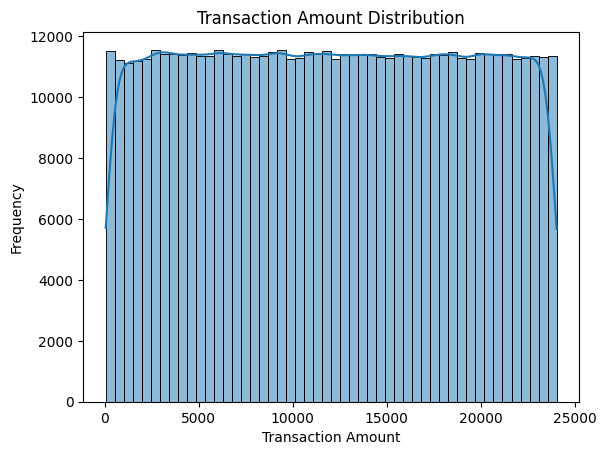

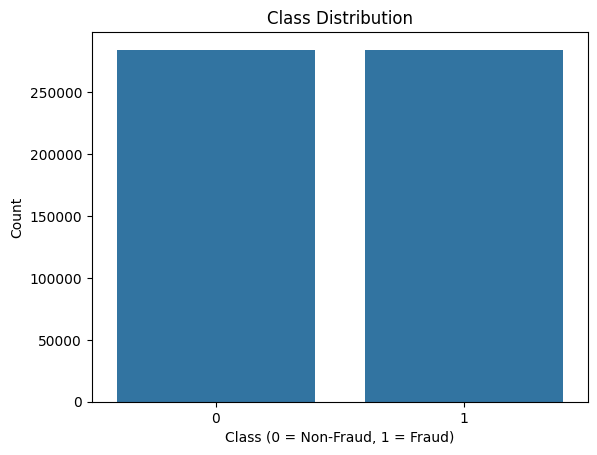

In [8]:
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [19]:
X = data.drop(columns=['Class', 'id'])
y = data['Class']
print("Columns in X:", X.columns)

scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
print("Normalized the 'Amount' column successfully.")
print(X.head())


Columns in X: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Normalized the 'Amount' column successfully.
         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.0955

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

print("Balanced Class Distribution:\n", pd.Series(y_train_balanced).value_counts())

Balanced Class Distribution:
 Class
1    227565
0    227565
Name: count, dtype: int64


In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.965214638692999
Confusion Matrix:
 [[55493  1257]
 [ 2699 54277]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [24]:
import joblib

joblib.dump(model, 'credit_fraud_model.pkl')

loaded_model = joblib.load('credit_fraud_model.pkl')

In [33]:
test_cases = pd.DataFrame({
    'id': [101, 102, 103, 104, 105],
    'V1': [-0.1, 2.5, -1.5, 0.3, -0.8],
    'V2': [0.2, -3.5, 0.5, -0.1, 0.3],
    'V3': [0.1, -1.8, -2.0, 0.0, -0.7],
    'V4': [-0.2, 1.7, 0.3, 0.2, -1.2],
    'V5': [0.0, -2.5, 0.4, -0.3, -0.4],
    'V6': [0.3, 3.0, -1.5, 0.2, 0.0],
    'V7': [0.2, -1.7, 0.2, -0.3, -0.5],
    'V8': [0.0, -0.5, -0.1, 0.4, -0.6],
    'V9': [-0.1, 2.3, -0.4, -0.2, 0.3],
    'V10': [0.2, -3.0, 0.6, 0.0, 0.1],
    'V11': [0.1, 1.8, -1.7, 0.2, -0.5],
    'V12': [0.3, -2.0, -0.2, -0.1, 0.4],
    'V13': [0.2, 0.4, 0.0, -0.3, -0.2],
    'V14': [0.1, -1.5, -0.3, 0.2, 0.1],
    'V15': [0.0, 2.5, 0.5, -0.1, -0.4],
    'V16': [0.2, -0.5, -0.1, 0.4, -0.6],
    'V17': [0.1, 2.3, -0.4, -0.2, 0.3],
    'V18': [-0.1, -3.0, 0.6, 0.0, 0.1],
    'V19': [0.3, -2.0, -0.2, -0.1, 0.4],
    'V20': [0.2, 0.4, 0.0, -0.3, -0.2],
    'V21': [-0.2, -1.5, -0.3, 0.2, 0.1],
    'V22': [0.0, 2.5, 0.5, -0.1, -0.4],
    'V23': [0.2, -0.5, -0.1, 0.4, -0.6],
    'V24': [0.1, 2.3, -0.4, -0.2, 0.3],
    'V25': [0.2, -3.0, 0.6, 0.0, 0.1],
    'V26': [0.3, -2.0, -0.2, -0.1, 0.4],
    'V27': [0.2, 0.4, 0.0, -0.3, -0.2],
    'V28': [-0.2, -1.5, -0.3, 0.2, 0.1],
    'Amount': [50.00, 15000.00, 10.00, 10000.00, 500.00]
})
test_cases['Amount'] = scaler.transform(test_cases[['Amount']])
test_features = test_cases[X_train.columns.tolist()]
test_predictions = model.predict(test_features)
test_cases['Prediction'] = test_predictions
print(test_cases[['id', 'Amount', 'Prediction']])

    id    Amount  Prediction
0  101 -1.733032           1
1  102  0.427485           1
2  103 -1.738813           1
3  104 -0.295096           1
4  105 -1.668000           1


In [34]:
import numpy as np
feature_importance = np.abs(model.coef_[0])
features = X_train.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

   Feature  Importance
3       V4    3.633857
13     V14    3.360130
7       V8    2.864946
11     V12    2.835995
16     V17    1.937717
9      V10    1.896904
10     V11    1.874013
2       V3    1.187865
6       V7    1.149738
17     V18    0.920384
15     V16    0.893450
0       V1    0.682233
8       V9    0.527427
5       V6    0.484133
21     V22    0.423482
22     V23    0.330591
20     V21    0.258239
14     V15    0.252927
26     V27    0.173967
23     V24    0.170996
24     V25    0.162892
27     V28    0.149821
1       V2    0.138391
19     V20    0.119544
25     V26    0.111300
18     V19    0.092041
12     V13    0.023503
4       V5    0.019081
28  Amount    0.003164
